<a href="https://colab.research.google.com/github/martinfernandoortiz/geoestadistica_unlp/blob/main/segundo_trabajo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# *Manejo de muestras de datos*
## Repaso de conceptos – Práctica 2
## Geoestadı́stica -Maestrı́a en Geomática UNLP

En un estudio global en todo el paı́s se registraron una serie de medi-
ciones meteorológicas mensuales durante el perı́odo 1981-2010. Con el
fin de caracterizar tendencias climatológicas se generó un base de datos.
En principio, como primera medida, se necesita identificar las principales
caracterı́sticas estadı́sticas de este set de datos con el fin de tener un re-
sultado rápido pero consistente. De esta manera se decidió que lo más
conveniente serı́a identificar en una tabla, por variable meteorológica, lo
siguiente:
    
***

In [17]:
################################################################
#
#   - Importacion de librerias
#   - Asignaciòn de alias
#
####################################################################

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import seaborn as sns
#import geopandas as gpd
# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
#https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

#Import Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
# Carga de datos

#path = "datasets/"
archivo = "SMN_estaciones_medias_mensuales_1989_2010.xls"
#df = pd.read_excel( 'SMN_estaciones_medias_mensuales_1989_2010.xls')
df = pd.read_excel('/content/drive/My Drive/Colab Notebooks/SMN_estaciones_medias_mensuales_1989_2010.xls')
df.replace("S/D", np.NaN, inplace = True) #reemplazar los "S/D"

#df['Temperatura_minima_(C)'].mean()

In [19]:
#Finalmente vamos a utilizar ésta forma para cambiar el tipo de campo
rango= np.r_[8:16]
df[df.columns[rango]] = df[df.columns[rango]].astype(float)
df.dtypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 16 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Unnamed: 0.1                           840 non-null    int64  
 1   Unnamed: 0                             840 non-null    int64  
 2   Estacion                               840 non-null    object 
 3   mes                                    840 non-null    object 
 4   lat                                    840 non-null    float64
 5   long                                   840 non-null    float64
 6   Altura_(m)                             840 non-null    int64  
 7   Numero                                 840 non-null    int64  
 8   Temperatura_(C)                        838 non-null    float64
 9   Temperatura_maxima_(C)                 840 non-null    float64
 10  Temperatura_minima_(C)                 818 non-null    float64
 11  Humeda

In [20]:
# Ver si reemplazamos outliers por na o por otra medida
def f(row):
    if (row[colname] < lower_lim) | (row[colname] > upper_lim):
        val = np.NaN
    else:
        val = row[colname]

    return val


In [21]:
def replace_outliers_with_limits(df, column_range, multiplier=1.5):
    for column_name in df.columns[column_range]:
        # Calcular la media y la desviación estándar de la columna
        mean_value = df[column_name].mean()
        std_value = df[column_name].std()

        # Calcular los límites del bigote (whisker)
        lower_limit = mean_value - multiplier * std_value
        upper_limit = mean_value + multiplier * std_value

        # Reemplazar los valores NaN por la media de la columna
        df[column_name].fillna(mean_value, inplace=True)

        # Identificar y reemplazar los outliers inferiores
        lower_outliers = df[column_name] < lower_limit
        df.loc[lower_outliers, column_name] = lower_limit

        # Identificar y reemplazar los outliers superiores
        upper_outliers = df[column_name] > upper_limit
        df.loc[upper_outliers, column_name] = upper_limit

    return df


# df = replace_outliers_with_limits(df, np.r_[8:15])

In [26]:
# Reemplazo los outliers
rango= np.r_[8:16]

df1 = df[df.columns[rango]]
df1  = replace_outliers_with_limits(df1, np.r_[8:16])
#df1[df1.columns[ np.r_[8:16]]] = df[df.columns[rango]]

IndexError: ignored

In [27]:
df1.head()

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm
0,12.800000,20.1,7.40000,65.30000,6.9,4.618394,97.5,10.324496
1,12.500000,19.9,7.00000,64.10000,7.1,4.618394,68.4,10.324496
2,12.400000,19.9,6.30000,62.40000,6.5,4.100000,55.9,9.800000
3,10.900000,19.7,2.80000,54.58063,6.4,2.916007,8.2,3.158891
4,6.976699,17.3,1.48679,54.58063,6.0,2.916007,1.0,3.158891


In [ ]:
 df1=df1.iloc[:, np.r_[8:16]]

In [ ]:
df1['Temperatura_minima_(C)'].mean()

10.481766831609912

In [ ]:
#Media

print('----------------------')
print('Media de cada variable')
print('----------------------')
df.mean(axis=0, numeric_only = True)



----------------------
Media de cada variable
----------------------


Unnamed: 0.1                               419.500000
Unnamed: 0                                 425.157143
lat                                        -31.455232
long                                       -57.741740
Altura_(m)                                 339.842857
Numero                                   87500.842857
Temperatura_(C)                             16.206180
Temperatura_maxima_(C)                      22.862769
Temperatura_minima_(C)                      10.481767
Humedad_relativa_(%)                        68.596860
Velocidad_del_Viento_(km/h)                 12.136814
Nubosidad_total_(octavos)                    3.767201
Precipitacion_(mm)                          67.196950
Frecuencia_dias_Precipitacion_>0.1_mm        6.741693
dtype: float64

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
df.var(axis=0) # Entrenamiento modelo PCA con escalado de los datos


-------------------------
Varianza de cada variable
-------------------------


Unnamed: 0.1                              58870.000000
Unnamed: 0                                61420.690414
lat                                          71.048752
long                                        123.912890
Altura_(m)                               241663.169556
Numero                                   127838.120688
Temperatura_(C)                              37.859250
Temperatura_maxima_(C)                       39.530233
Temperatura_minima_(C)                       35.959827
Humedad_relativa_(%)                         87.313210
Velocidad_del_Viento_(km/h)                  17.178439
Nubosidad_total_(octavos)                     0.322014
Precipitacion_(mm)                         2178.925405
Frecuencia_dias_Precipitacion_>0.1_mm         5.705100
dtype: float64

In [ ]:
df['Estacion']

0            LA QUIACA
1            LA QUIACA
2            LA QUIACA
3            LA QUIACA
4            LA QUIACA
            ...       
835    BASE SAN MARTIN
836    BASE SAN MARTIN
837    BASE SAN MARTIN
838    BASE SAN MARTIN
839    BASE SAN MARTIN
Name: Estacion, Length: 840, dtype: object

In [ ]:
X_std = StandardScaler().fit_transform(X)

In [ ]:
X_std

array([[-0.55391134, -0.43968193, -0.51422081, ...,  2.11114616,
         0.6495668 ,  1.7426855 ],
       [-0.60269719, -0.471511  , -0.58096444, ...,  1.82111534,
         0.0257882 ,  1.7426855 ],
       [-0.61895914, -0.471511  , -0.6977658 , ...,  0.58681864,
        -0.24215794,  1.28117396],
       ...,
       [-1.76103752, -1.84872971, -1.73864483, ...,  2.11114616,
         0.04582937,  0.00636088],
       [-1.76103752, -1.84872971, -1.73864483, ...,  2.11114616,
         0.04582937,  0.00636088],
       [-1.76103752, -1.84872971, -1.73864483, ...,  2.11114616,
         0.04582937,  0.00636088]])

In [ ]:
# Calculamos la matriz de covarianza

print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))



NumPy covariance matrix: 
[[ 1.0011919   0.98503739  0.97438591 -0.12541886 -0.22033743 -0.41075686
   0.61183998  0.3892094 ]
 [ 0.98503739  1.0011919   0.94006507 -0.21452446 -0.26537916 -0.47932947
   0.53851248  0.30701386]
 [ 0.97438591  0.94006507  1.0011919   0.00324575 -0.23583834 -0.33758658
   0.66175472  0.44125108]
 [-0.12541886 -0.21452446  0.00324575  1.0011919  -0.20437937  0.41376008
   0.37156794  0.3681683 ]
 [-0.22033743 -0.26537916 -0.23583834 -0.20437937  1.0011919   0.23929917
  -0.07531678  0.10261437]
 [-0.41075686 -0.47932947 -0.33758658  0.41376008  0.23929917  1.0011919
   0.02216611  0.337404  ]
 [ 0.61183998  0.53851248  0.66175472  0.37156794 -0.07531678  0.02216611
   1.0011919   0.82594063]
 [ 0.3892094   0.30701386  0.44125108  0.3681683   0.10261437  0.337404
   0.82594063  1.0011919 ]]


In [ ]:
#Calculamos los autovalores y autovectores de la matriz y los mostramos
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.49108273  0.1230824   0.06917832 -0.14030651 -0.23477484  0.79333162
  -0.18087785  0.04478656]
 [ 0.47764283  0.19693991  0.0498487  -0.175243   -0.15273808 -0.54910145
  -0.60946189  0.05993225]
 [ 0.49204956  0.04767119  0.01642562 -0.10945551 -0.32899558 -0.25989621
   0.75295064  0.02540826]
 [ 0.01460079 -0.51808246 -0.48488755  0.40563471 -0.52932187 -0.01495687
  -0.14938803  0.17029328]
 [-0.13913609 -0.12349036  0.84010912  0.33254313 -0.38133434 -0.03356975
  -0.04960118  0.00446405]
 [-0.18162855 -0.52946174  0.09302664 -0.75836869 -0.21423966 -0.00902838
  -0.04890398 -0.2335221 ]
 [ 0.3946485  -0.35976757  0.04486655  0.2945118   0.32467318 -0.01053381
  -0.03073723 -0.72083371]
 [ 0.2833265  -0.50037097  0.20222125 -0.02527358  0.48621492 -0.00483652
   0.02813     0.62498253]]

Eigenvalues 
[3.86243711 2.09997571 1.12782859 0.44210338 0.33981071 0.00605814
 0.03249033 0.0988312 ]


In [ ]:

#  Hacemos una lista de parejas (autovector, autovalor)
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Ordenamos estas parejas den orden descendiente con la función sort
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visualizamos la lista de autovalores en orden desdenciente
print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
3.8624371098689405
2.0999757051818433
1.1278285883002441
0.44210337529534943
0.33981070801314034
0.09883120257448375
0.03249032835729555
0.006058143314547163


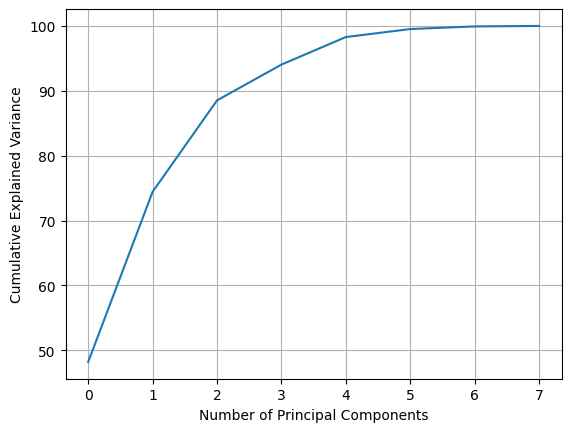

In [ ]:

# A partir de los autovalores, calculamos la varianza explicada
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.plot(np.cumsum(var_exp))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

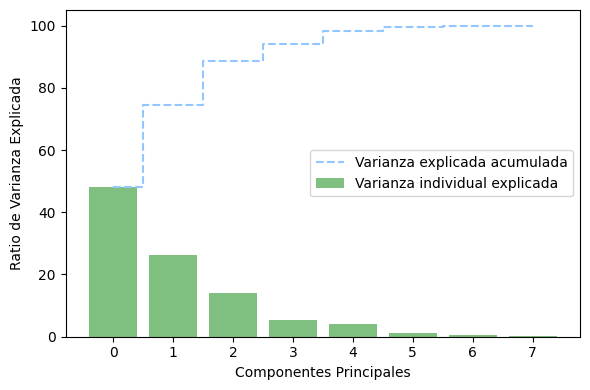

In [ ]:
# Representamos en un diagrama de barras la varianza explicada por cada autovalor, y la acumulada
with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(8), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(8), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [ ]:
#Generamos la matríz a partir de los pares autovalor-autovector
matrix_w = np.hstack((eig_pairs[0][1].reshape(8,1),
                      eig_pairs[1][1].reshape(8,1)))
print('Matriz W:\n', matrix_w)
Y = X_std.dot(matrix_w)

Matriz W:
 [[ 0.49108273  0.1230824 ]
 [ 0.47764283  0.19693991]
 [ 0.49204956  0.04767119]
 [ 0.01460079 -0.51808246]
 [-0.13913609 -0.12349036]
 [-0.18162855 -0.52946174]
 [ 0.3946485  -0.35976757]
 [ 0.2833265  -0.50037097]]


In [ ]:
Y

array([[-0.19764561, -2.06370967],
       [-0.47173714, -1.64057839],
       [-0.53201873, -0.55511037],
       ...,
       [-3.24196549, -2.01389319],
       [-3.20501678, -1.98109932],
       [-3.17478602, -1.95426798]])

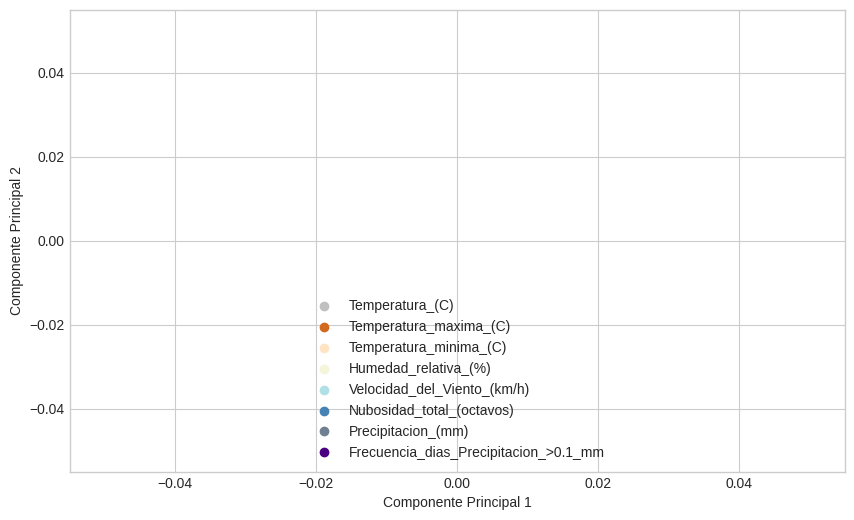

In [ ]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(10, 6))
    for lab, col in zip(('Temperatura_(C)', 'Temperatura_maxima_(C)', 'Temperatura_minima_(C)',
       'Humedad_relativa_(%)', 'Velocidad_del_Viento_(km/h)',
       'Nubosidad_total_(octavos)', 'Precipitacion_(mm)',
       'Frecuencia_dias_Precipitacion_>0.1_mm'),
                        ('silver', 'chocolate', 'bisque','beige', 'powderblue', 'steelblue','slategray', 'indigo')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    #plt.tight_layout()
    plt.show()

In [ ]:
df1.tail()

,Temperatura_(C),Temperatura_maxima_(C),Temperatura_minima_(C),Humedad_relativa_(%),Velocidad_del_Viento_(km/h),Nubosidad_total_(octavos),Precipitacion_(mm),Frecuencia_dias_Precipitacion_>0.1_mm
835,5.376991,11.246158,0.061928,68.044581,18.9,4.964484,69.334944,6.756877
836,5.376991,11.246158,0.061928,68.044581,17.5,4.964484,69.334944,6.756877
837,5.376991,11.246158,0.061928,68.044581,20.3,4.964484,69.334944,6.756877
838,5.376991,11.246158,0.061928,68.044581,19.2,4.964484,69.334944,6.756877
839,5.376991,11.246158,0.061928,68.044581,18.3,4.964484,69.334944,6.756877


In [12]:

# Step 1: Extract numeric columns
numeric_columns = df1.select_dtypes(include=[np.number])

# Step 2: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_columns)

# Step 3: Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Step 4: Creating a DataFrame with Principal Components
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Concatenate with the original DataFrame if needed
final_df = pd.concat([df, pca_df], axis=1)

# Step 5: Scatter plot of the first two principal components using seaborn
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10, 6))

categories = ['Temperatura_(C)', 'Temperatura_maxima_(C)', 'Temperatura_minima_(C)',
              'Humedad_relativa_(%)', 'Velocidad_del_Viento_(km/h)',
              'Nubosidad_total_(octavos)', 'Precipitacion_(mm)',
              'Frecuencia_dias_Precipitacion_>0.1_mm']

colors = ['silver', 'chocolate', 'bisque', 'beige', 'powderblue', 'steelblue', 'slategray', 'indigo']

# Create a DataFrame for plotting
plot_data = pd.DataFrame(data={'PC1': final_df['PC1'], 'PC2': final_df['PC2'], 'variable': final_df['variable']})

# Use seaborn to create a scatter plot with hue (color) based on 'variable'
sns.scatterplot(data=plot_data, x='PC1', y='PC2', hue='variable', palette=colors, s=50)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.title('Scatter Plot of Principal Components 1 and 2')
plt.show()

KeyError: ignored

<Figure size 1000x600 with 0 Axes>

In [35]:
numeric_data = df1.select_dtypes(include=[np.number])
normalized_data = (numeric_data - numeric_data.mean()) / numeric_data.std()

pca = PCA()
pca_result = pca.fit_transform(normalized_data)

print("Standard deviation:")
print(np.sqrt(pca.explained_variance_))

print("\nProportion of variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative proportion:")
print(np.cumsum(pca.explained_variance_ratio_))


print("\nEigenvalues:")
print(pca.explained_variance_)


# Imprimir los vectores de carga (Variable Loadings)
print("\nVariable Loadings:")
print(pd.DataFrame(pca.components_.T, index=numeric_data.columns, columns=[f"PC{i+1}" for i in range(pca.n_components_)]))

Standard deviation:
[1.97285219 1.43043478 1.05846896 0.67610501 0.59111412 0.30494879
 0.18808891 0.08030548]

Proportion of variance:
[0.48651822 0.25576796 0.14004457 0.05713975 0.04367699 0.01162422
 0.00442218 0.00080612]

Cumulative proportion:
[0.48651822 0.74228618 0.88233074 0.93947049 0.98314748 0.9947717
 0.99919388 1.        ]

Eigenvalues:
[3.89214576 2.04614365 1.12035653 0.45711799 0.3494159  0.09299376
 0.03537744 0.00644897]

Variable Loadings:
                                            PC1       PC2       PC3       PC4  \
Temperatura_(C)                        0.488962 -0.124570  0.049873  0.134183   
Temperatura_maxima_(C)                 0.475681 -0.196376  0.035161  0.173086   
Temperatura_minima_(C)                 0.489014 -0.050676 -0.004378  0.092793   
Humedad_relativa_(%)                   0.011885  0.531442 -0.461125 -0.454816   
Velocidad_del_Viento_(km/h)           -0.118307  0.119766  0.857298 -0.319857   
Nubosidad_total_(octavos)             -0.187939 

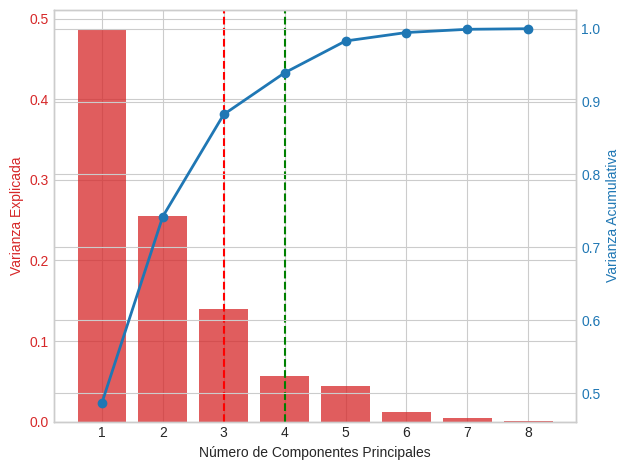

In [37]:

# Obtener la varianza explicada y acumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Crear un DataFrame para facilitar la manipulación y ordenar por varianza explicada descendente
explained_variance_df = pd.DataFrame({'Componente': range(1, len(explained_variance) + 1),
                                      'Varianza Explicada': explained_variance,
                                      'Varianza Acumulativa': cumulative_explained_variance})
explained_variance_df = explained_variance_df.sort_values(by='Varianza Explicada', ascending=False)

# Crear el gráfico de barras y la línea de varianza acumulativa
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Componentes Principales')
ax1.set_ylabel('Varianza Explicada', color=color)
ax1.bar(explained_variance_df['Componente'], explained_variance_df['Varianza Explicada'], color=color, alpha=0.75)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Varianza Acumul# Obtener la varianza explicada y acumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Crear un DataFrame para facilitar la manipulación y ordenar por varianza explicada descendente
explained_variance_df = pd.DataFrame({'Componente': range(1, len(explained_variance) + 1),
                                      'Varianza Explicada': explained_variance,
                                      'Varianza Acumulativa': cumulative_explained_variance})
explained_variance_df = explained_variance_df.sort_values(by='Varianza Explicada', ascending=False)

# Crear el gráfico de barras y la línea de varianza acumulativa
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Número de Componentes Principales')
ax1.set_ylabel('Varianza Explicada', color=color)
ax1.bar(explained_variance_df['Componente'], explained_variance_df['Varianza Explicada'], color=color, alpha=0.75)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Varianza Acumulativa', color=color)
ax2.plot(explained_variance_df['Componente'], explained_variance_df['Varianza Acumulativa'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir líneas para indicar el Kaiser criterion y el 95% threshold criterion
ax1.axvline(x=3, color='r', linestyle='--', label='Kaiser Criterion')
ax1.axvline(x=4, color='g', linestyle='--', label='95% Threshold Criterion')

# Ajustar el diseño del gráfico
fig.tight_layout()

# Mostrar el gráfico
plt.show()ativa', color=color)
ax2.plot(explained_variance_df['Componente'], explained_variance_df['Varianza Acumulativa'], color=color, marker='o', linestyle='-', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Añadir líneas para indicar el Kaiser criterion y el 95% threshold criterion
ax1.axvline(x=3, color='r', linestyle='--', label='Kaiser Criterion')
ax1.axvline(x=4, color='g', linestyle='--', label='95% Threshold Criterion')

# Ajustar el diseño del gráfico
fig.tight_layout()

# Mostrar el gráfico
plt.show()

In [47]:
import plotly.graph_objects as go

# Obtener la varianza explicada y acumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance)

# Crear un DataFrame para facilitar la manipulación y ordenar por varianza explicada descendente
explained_variance_df = pd.DataFrame({'Componente': range(1, len(explained_variance) + 1),
                                      'Varianza Explicada': explained_variance,
                                      'Varianza Acumulativa': cumulative_explained_variance})
explained_variance_df = explained_variance_df.sort_values(by='Varianza Explicada', ascending=False)

# Crear subgráfico para Varianza Explicada
fig_bar = go.Figure()

fig_bar.add_trace(go.Bar(x=explained_variance_df['Componente'], y=explained_variance_df['Varianza Explicada'], name='Varianza Explicada', marker_color='skyblue'))
fig_bar.add_shape(go.layout.Shape(type='line', x0=3, x1=3, y0=0, y1=1, line=dict(color='red', dash='dash')))
fig_bar.add_shape(go.layout.Shape(type='line', x0=4, x1=4, y0=0, y1=1, line=dict(color='green', dash='dash')))

fig_bar.update_layout(xaxis_title='Número de Componentes Principales',
                      yaxis=dict(title='Varianza Explicada', color='skyblue'),
                      title='Varianza Explicada vs Número de Componentes Principales')
# Configurar el tema
fig_bar.update_layout(template="plotly_dark")
# Crear subgráfico para Varianza Acumulativa
fig_line = go.Figure()

fig_line.add_trace(go.Scatter(x=explained_variance_df['Componente'], y=explained_variance_df['Varianza Acumulativa'],
                              mode='lines+markers', name='Varianza Acumulativa', line=dict(color='orange', width=2)))
fig_line.add_shape(go.layout.Shape(type='line', x0=3, x1=3, y0=0, y1=1, line=dict(color='red', dash='dash')))
fig_line.add_shape(go.layout.Shape(type='line', x0=4, x1=4, y0=0, y1=1, line=dict(color='green', dash='dash')))

fig_line.update_layout(xaxis_title='Número de Componentes Principales',
                       yaxis=dict(title='Varianza Acumulativa', color='orange'),
                       title='Varianza Acumulativa vs Número de Componentes Principales')

# Configurar el tema
fig_line.update_layout(template="plotly_dark")
# Mostrar los gráficos interactivos
fig_bar.show()
fig_line.show()



Seleccionar dos variables originales que mejor se correlacionen con
las PC1, 2 y 3 (con cada PC por separado). Indicar el valor del
coeficiente de correlación r2 . Graficar en diferentes scatterplot las
relaciones entre estas variables.


Variables seleccionadas para PC1:
                  Variable       PC1
2  Temperatura_minima_(C)  0.489014
0         Temperatura_(C)  0.488962

Variables seleccionadas para PC2:
                     Variable       PC2
3       Humedad_relativa_(%)  0.531442
5  Nubosidad_total_(octavos)  0.529235

Variables seleccionadas para PC3:
                                 Variable       PC3
4            Velocidad_del_Viento_(km/h)  0.857298
7  Frecuencia_dias_Precipitacion_>0.1_mm  0.202098


<Figure size 1500x1500 with 0 Axes>

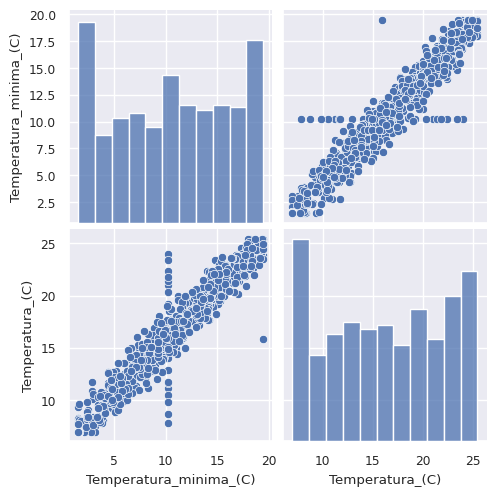

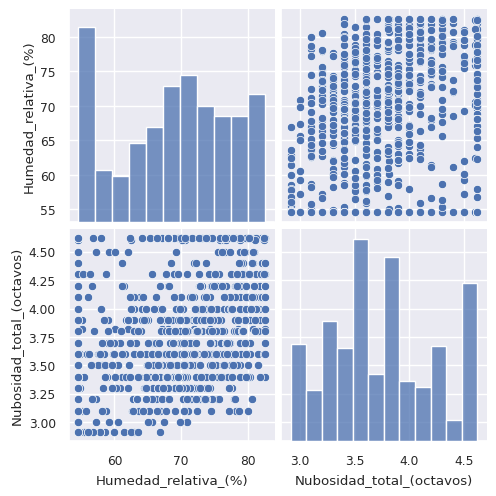

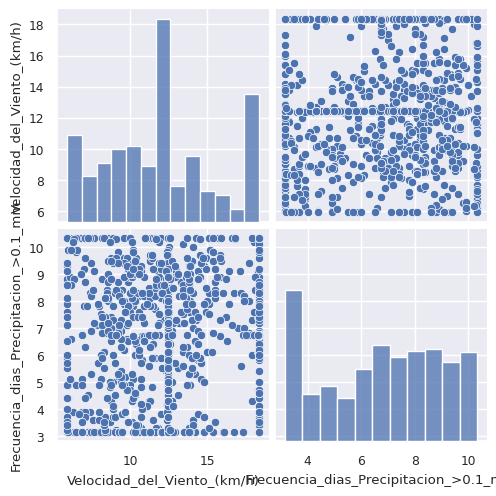

In [52]:

# Configurar la opción para que las columnas no se truncen
pd.set_option('display.max_colwidth', None)

# Resto del código...

# Obtener los vectores de carga para PC1, PC2 y PC3
loadings_pc1 = pca.components_[0]
loadings_pc2 = pca.components_[1]
loadings_pc3 = pca.components_[2]

# Crear un DataFrame con los loadings y los nombres de las variables originales
loadings_df = pd.DataFrame({'Variable': numeric_data.columns, 'PC1': loadings_pc1, 'PC2': loadings_pc2, 'PC3': loadings_pc3})

# Seleccionar las dos variables con los mayores loadings absolutos para PC1, PC2 y PC3
selected_variables_pc1 = loadings_df[['Variable', 'PC1']].nlargest(2, 'PC1')
selected_variables_pc2 = loadings_df[['Variable', 'PC2']].nlargest(2, 'PC2')
selected_variables_pc3 = loadings_df[['Variable', 'PC3']].nlargest(2, 'PC3')

# Imprimir las variables seleccionadas para cada PC
print("Variables seleccionadas para PC1:\n", selected_variables_pc1)
print("\nVariables seleccionadas para PC2:\n", selected_variables_pc2)
print("\nVariables seleccionadas para PC3:\n", selected_variables_pc3)


sns.set(font_scale=0.8)  # Puedes ajustar el valor según tus preferencias
# Configurar el tamaño de las figuras para los scatterplots
plt.figure(figsize=(15, 15))  # Puedes ajustar los valores de ancho y alto según tus necesidades

# Graficar scatterplots para las relaciones seleccionadas
sns.pairplot(df, x_vars=selected_variables_pc1['Variable'], y_vars=selected_variables_pc1['Variable'])
sns.pairplot(df, x_vars=selected_variables_pc2['Variable'], y_vars=selected_variables_pc2['Variable'])
sns.pairplot(df, x_vars=selected_variables_pc3['Variable'], y_vars=selected_variables_pc3['Variable'])

# Mostrar los gráficos
plt.show()

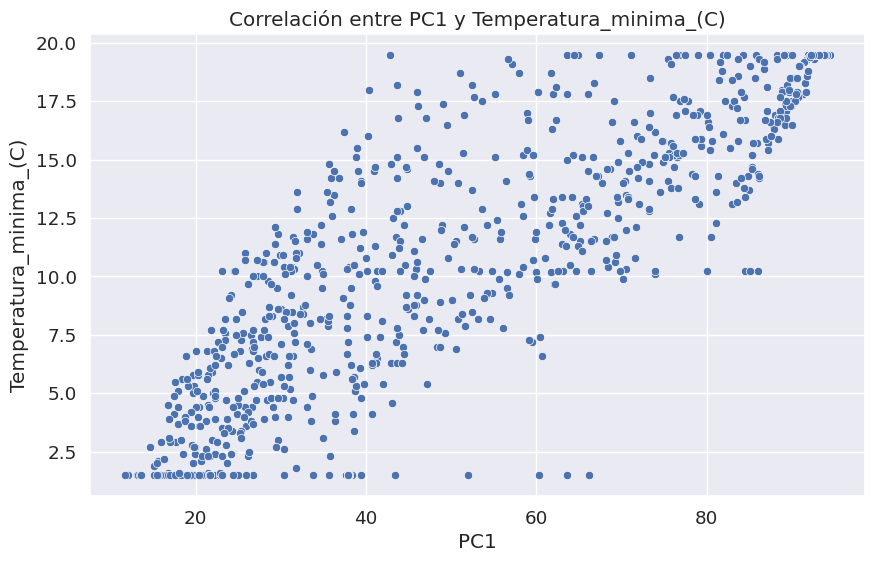

In [53]:

# Configurar el tamaño de la fuente en los gráficos de seaborn
sns.set(font_scale=1.2)  # Ajusta el tamaño de la fuente según tus preferencias

# Crear un DataFrame combinando la PC1 y la variable seleccionada para PC1
df_pc1_vs_variable = pd.DataFrame({
    'PC1': numeric_data.dot(loadings_pc1),
    selected_variables_pc1['Variable'].iloc[0]: df[selected_variables_pc1['Variable'].iloc[0]]
})

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.scatterplot(x='PC1', y=selected_variables_pc1['Variable'].iloc[0], data=df_pc1_vs_variable)

# Añadir etiquetas y título
plt.xlabel('PC1')
plt.ylabel(selected_variables_pc1['Variable'].iloc[0])
plt.title('Correlación entre PC1 y {}'.format(selected_variables_pc1['Variable'].iloc[0]))

# Mostrar el gráfico
plt.show()

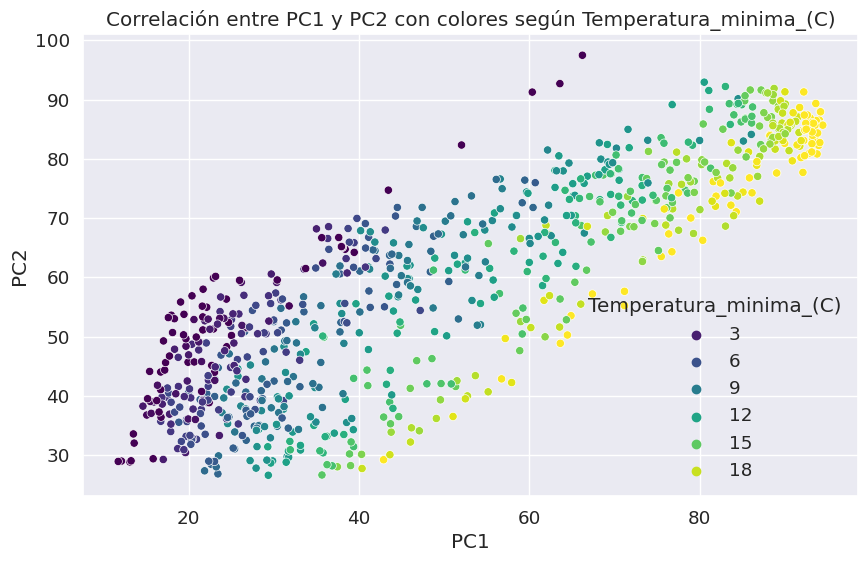

In [54]:

# Crear un DataFrame combinando PC1, PC2 y la variable seleccionada para PC1
df_pc1_pc2_vs_variable = pd.DataFrame({
    'PC1': numeric_data.dot(loadings_pc1),
    'PC2': numeric_data.dot(loadings_pc2),
    selected_variables_pc1['Variable'].iloc[0]: df[selected_variables_pc1['Variable'].iloc[0]]
})

# Crear el gráfico de dispersión con colores según la variable original
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.scatterplot(x='PC1', y='PC2', hue=selected_variables_pc1['Variable'].iloc[0], data=df_pc1_pc2_vs_variable, palette='viridis')

# Añadir etiquetas y título
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Correlación entre PC1 y PC2 con colores según {}'.format(selected_variables_pc1['Variable'].iloc[0]))

# Mostrar el gráfico
plt.show()

[link text](https://)